# Read Arm Image

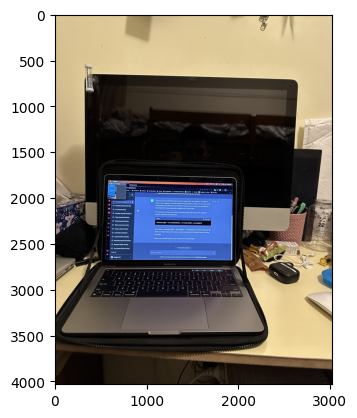

In [7]:
from PIL import Image

img_path = '/Users/abdul/Documents/VS-Code/42028-Deep-Learning-and-CNN/Code/IMG_5693.JPG'
img = Image.open(img_path)

# Try to get the EXIF data
try:
    exif_data = img._getexif()
    if 274 in exif_data:    # 274 is the EXIF tag for Orientation
        orientation = exif_data[274]

        # Handle the orientation
        if orientation == 3:
            img = img.rotate(180, expand=True)
        elif orientation == 6:
            img = img.rotate(-90, expand=True)
        elif orientation == 8:
            img = img.rotate(90, expand=True)
except:
    pass

# Now img is a PIL Image object with the correct orientation
# You can convert it to a NumPy array and display it with matplotlib if needed
import numpy as np
import matplotlib.pyplot as plt

image = np.array(img)
plt.imshow(image)
plt.show()

In [2]:
print(image.shape)

new_height = 1280
divider = image.shape[0] / new_height
new_width = image.shape[1] / divider

(4032, 3024, 3)


In [8]:
import numpy as np
from scipy.ndimage import zoom


def resize_image(image, new_shape):
    resized_image = zoom(image, (new_shape[0] / image.shape[0], new_shape[1] / image.shape[1], 1))
    return resized_image

resized_image = resize_image(image, (new_height, new_width, 3))

print(resized_image.shape)

(1280, 960, 3)


(1280, 720, 3)


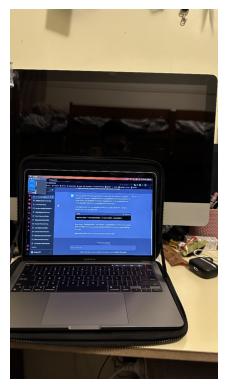

In [9]:
def crop_image(image, new_shape):
    current_shape = image.shape
    y_start = (current_shape[0] - new_shape[0]) // 2
    y_end = y_start + new_shape[0]
    x_start = (current_shape[1] - new_shape[1]) // 2
    x_end = x_start + new_shape[1]
    cropped_image = image[y_start:y_end, x_start:x_end, :]
    return cropped_image

cropped_image = crop_image(resized_image, (1280, 720, 3))
print(cropped_image.shape)
plt.imshow(cropped_image)
plt.axis('off')  # Turn off the axis labels
plt.show()

In [10]:
cropped_np = np.array(cropped_image) #convert to np array


(160, 90, 3)


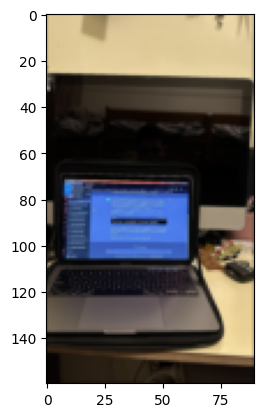

In [11]:
from skimage.transform import resize

# Resize the image using the resize function
resized_pre_image = resize(cropped_np, (160, 90, 3), mode='constant')
plt.imshow(resized_pre_image)
#plt.imshow(cropped_image)
print(resized_pre_image.shape) # resize for cnn model 

# Preprocessing Completed

## Predict keypoint

In [7]:
from tensorflow.keras.models import load_model
import tensorflow.keras.utils as keras_utils

from IPython.display import Image

# Load the model from the .h5 file
model = load_model('/Users/abdul/Documents/VS-Code/42028-Deep-Learning-and-CNN/Code/model_with_background.h5')

# Generate the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 160, 90, 32)       864       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 160, 90, 32)       0         
                                                                 
 batch_normalization_12 (Ba  (None, 160, 90, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 160, 90, 32)       9216      
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 160, 90, 32)       0         
                                                                 
 batch_normalization_13 (Ba  (None, 160, 90, 32)       128       
 tchNormalization)                                    

In [8]:
# add an extra dimension for the batch
image_batch = np.expand_dims(resized_pre_image, axis=0)

# Make predictions
predictions = model.predict(image_batch)

1/1 [==============================] - 0s 138ms/step


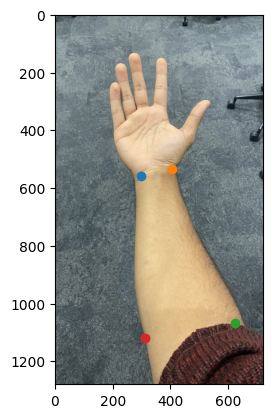

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted keypoints for the selected image
image_to_predict = cropped_image
predicted_keypoints = predictions

# Reshape the predicted keypoints array to a (4, 2) matrix
predicted_keypoints = np.array(predicted_keypoints).reshape((4, 2))

# Display the image and predicted keypoints
plt.imshow(image_to_predict)

# Plot the keypoints
for i in range(predicted_keypoints.shape[0]):
    x = predicted_keypoints[i][0]
    y = predicted_keypoints[i][1]
    if x < 0:
        x = 0
    if y < 0:
        y = 0
    plt.scatter(x, y)

plt.show()

# Read Tattoo Image

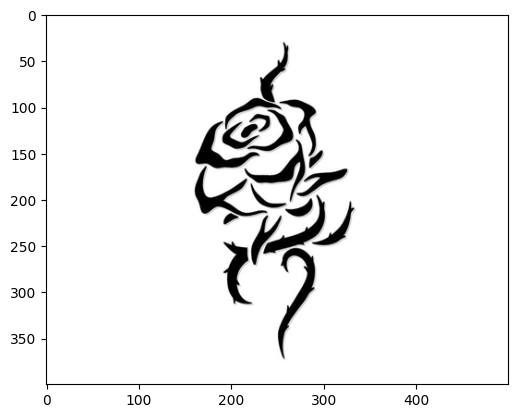

In [10]:
from PIL import Image
import numpy as np

# Load the tattoo image
tattoo_image = Image.open("Testing_Tattoo_Images/rose.jpg")

width = 500 #change these values for preferred size 
height = 400

scaled_tattoo = tattoo_image.resize((width,height))
plt.imshow(scaled_tattoo)

In [11]:

# Create a white background image
background_color = (255, 255, 255)  # White color in RGB
background_image = Image.new("RGB", (400, 800), background_color)

# Create a blank canvas with the desired dimensions
canvas = Image.new("RGB", (400, 800), background_color)

# Calculate the position to place the image at the center of the canvas
x = (canvas.width - scaled_tattoo.width) // 2
y = (canvas.height - scaled_tattoo.height) // 2

# Overlay the image onto the canvas using PIL
canvas.paste(scaled_tattoo, (x, y))

# Convert the final image to a NumPy array
image_array = np.array(canvas)


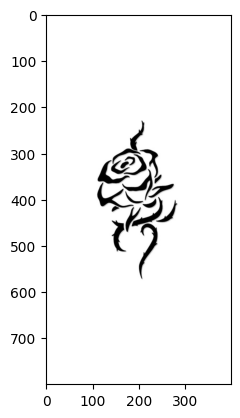

(800, 400, 3)


In [12]:
# Display the image
plt.imshow(image_array)
plt.show()
# Print the shape of the image array
print(image_array.shape)

In [13]:
from skimage.transform import resize

# Ensure image is within [0, 1] range
image_array = image_array / 255.0

resized_image = resize(image_array, (800, 320, 3), mode='constant')

# If you want to display or save the image using cv2 or matplotlib, you might need to scale it back to [0, 255]



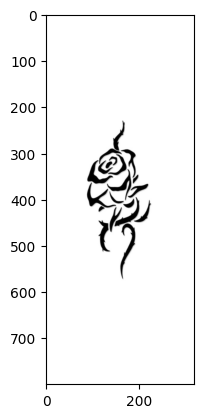

(800, 320, 3)


In [14]:
# Display the image
plt.imshow(resized_image)
plt.show()
print(resized_image.shape)

## Warp Tattoo Image

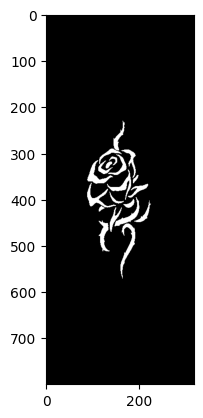

In [15]:
import numpy as np

# Define the threshold value
threshold = 0.5

# Binarize the image array
binarized_image_array = np.where(resized_image > threshold, 0., 1.)

plt.imshow(binarized_image_array)
plt.show()

[[ 298.42426  559.14795]
 [ 406.41608  534.4196 ]
 [ 624.43884 1065.8245 ]
 [ 312.39957 1118.1929 ]]


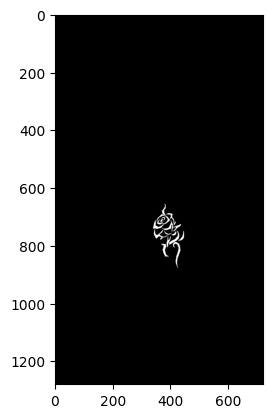

In [16]:
import cv2
tl = (70, 0)
bl = (0, 800)
tr = (250, 0)
br = (320, 800)

print(predicted_keypoints)
pts1 = np.float32([tl, bl, tr, br])
pts2 = np.float32([[predicted_keypoints[0][0], predicted_keypoints[0][1]], [predicted_keypoints[3][0], predicted_keypoints[3][1]], [predicted_keypoints[1][0], predicted_keypoints[1][1]], [predicted_keypoints[2][0], predicted_keypoints[2][1]]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
transformed_frame = cv2.warpPerspective(binarized_image_array, matrix, (720, 1280))

plt.imshow(transformed_frame)
plt.show()

#tl, tr, br, bl

(1280, 720, 3)


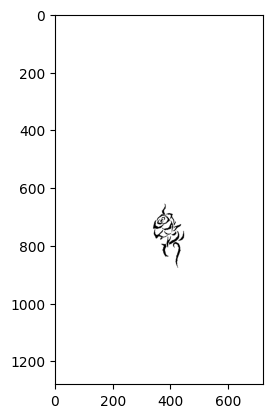

In [17]:
# Define the threshold value
threshold = 0.5

# Binarize the image array
new_one = np.where(transformed_frame > threshold, 0., 1.) ##invert colours
print(new_one.shape)
plt.imshow(new_one)
plt.show()

## Convert to RGBA

In [18]:
import numpy as np

def convert_tattoo_to_rgba(image_array, alpha=255):
    # Check if the input image is already in RGBA format
    if image_array.shape[2] == 4:
        return image_array

    # Create an alpha channel with the specified value
    alpha_channel = np.full((image_array.shape[0], image_array.shape[1], 1), alpha, dtype=np.uint8)

    # Identify white pixels
    white_pixels = np.all(image_array == [1., 1., 1.], axis=-1)
    black_pixels = np.all(image_array == [0., 0., 0.], axis=-1)

    # Set alpha to 0 for white pixels
    alpha_channel[white_pixels] = 0
    alpha_channel[black_pixels] = int(0.8 * alpha)

    # Concatenate the alpha channel with the RGB image
    rgba_array = np.concatenate((image_array, alpha_channel), axis=2)

    return rgba_array


(1280, 720, 4)


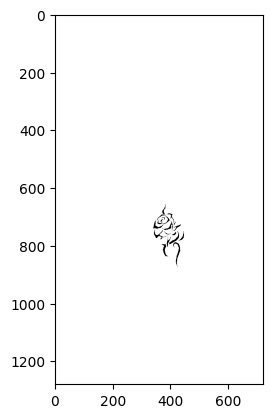

In [19]:
image_with_alpha = convert_tattoo_to_rgba(new_one)
plt.imshow(image_with_alpha)
print(image_with_alpha.shape)
plt.show()


# Place Tattoo over arm

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def convert_tattoo_to_rgba(image_array, alpha=255):
    # Check if the input image is already in RGBA format
    if image_array.shape[2] == 4:
        return image_array

    # Create an alpha channel with the specified value
    alpha_channel = np.full((image_array.shape[0], image_array.shape[1], 1), alpha, dtype=np.uint8)

    # Identify white pixels
    white_pixels = np.all(np.round(image_array * 255) == [255, 255, 255], axis=-1)
    black_pixels = np.all(np.round(image_array * 255) == [0, 0, 0], axis=-1)

    # Set alpha to 0 for white pixels
    alpha_channel[white_pixels] = 0
    alpha_channel[black_pixels] = int(0.75 * alpha)

    # Concatenate the alpha channel with the RGB image
    rgba_array = np.concatenate((image_array, alpha_channel), axis=2)

    return rgba_array

# Assuming 'new_one' is your original RGB image data
image_with_alpha = convert_tattoo_to_rgba(new_one)


In [21]:
rgba_arm = convert_tattoo_to_rgba(cropped_image)

(1280, 720, 4)


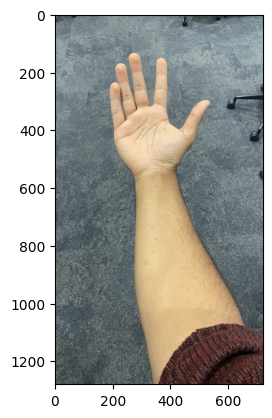

In [22]:
plt.imshow(rgba_arm)
print(rgba_arm.shape)

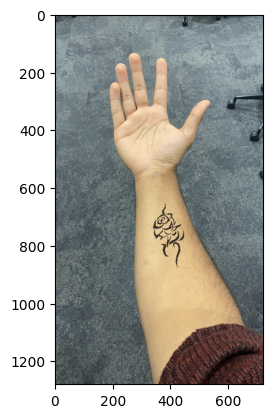

In [44]:
def overlay_images(background, overlay):
    # Create a copy of the background image to modify
    result = background.copy()

    # Resize the overlay image to match the background shape
    overlay_resized = overlay[:background.shape[0], :background.shape[1]]

    # Normalize the alpha values to range between 0 and 1
    overlay_alpha = overlay_resized[..., 3] / 255.0

    # Compute the weighted overlay using alpha blending
    result_alpha = 1 - (1 - overlay_alpha) * (1 - result[..., 3] / 255.0)
    result_alpha = np.clip(result_alpha, 0, 1)

    result[..., :3] = overlay_alpha[..., None] * overlay_resized[..., :3] + (1 - overlay_alpha[..., None]) * result[..., :3]
    result[..., 3] = result_alpha * 255

    return result





overlaid_image = overlay_images(rgba_arm, image_with_alpha)
plt.imshow(overlaid_image)
plt.show()
